In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json

In [3]:
# Read CSV into dataframe
df = pd.read_csv('public_repositories.csv')

In [4]:
# Get information for Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 46 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   id                 1000000 non-null  int64 
 1   node_id            1000000 non-null  object
 2   name               999996 non-null   object
 3   full_name          1000000 non-null  object
 4   private            1000000 non-null  bool  
 5   owner              1000000 non-null  object
 6   html_url           1000000 non-null  object
 7   description        855663 non-null   object
 8   fork               1000000 non-null  bool  
 9   url                1000000 non-null  object
 10  forks_url          1000000 non-null  object
 11  keys_url           1000000 non-null  object
 12  collaborators_url  1000000 non-null  object
 13  teams_url          1000000 non-null  object
 14  hooks_url          1000000 non-null  object
 15  issue_events_url   1000000 non-null  object
 16  e

In [43]:
# Get rows and columns for dataframe
df.shape

(1000000, 46)

In [10]:
# Extract useful columns
df_new = df.iloc[:,0:9]
df_new = df_new.drop(['node_id', 'owner'], axis=1)
df_new.head()

,id,name,full_name,private,html_url,description,fork
0,1,grit,mojombo/grit,False,https://github.com/mojombo/grit,**Grit is no longer maintained. Check out libg...,False
1,26,merb-core,wycats/merb-core,False,https://github.com/wycats/merb-core,Merb Core: All you need. None you don't.,False
2,27,rubinius,rubinius/rubinius,False,https://github.com/rubinius/rubinius,The Rubinius Language Platform,False
3,28,god,mojombo/god,False,https://github.com/mojombo/god,Ruby process monitor,False
4,29,jsawesome,vanpelt/jsawesome,False,https://github.com/vanpelt/jsawesome,Awesome JSON,False


In [11]:
# Get owner username from full_name
full_name = df_new['full_name'].str.split('/', n=1, expand=True)
df_new['owner_name'] = full_name[0]
df_new.head()

,id,name,full_name,private,html_url,description,fork,owner_name
0,1,grit,mojombo/grit,False,https://github.com/mojombo/grit,**Grit is no longer maintained. Check out libg...,False,mojombo
1,26,merb-core,wycats/merb-core,False,https://github.com/wycats/merb-core,Merb Core: All you need. None you don't.,False,wycats
2,27,rubinius,rubinius/rubinius,False,https://github.com/rubinius/rubinius,The Rubinius Language Platform,False,rubinius
3,28,god,mojombo/god,False,https://github.com/mojombo/god,Ruby process monitor,False,mojombo
4,29,jsawesome,vanpelt/jsawesome,False,https://github.com/vanpelt/jsawesome,Awesome JSON,False,vanpelt


# EDA

## Patterns for Owners

In [39]:
owner_repos = df_new.groupby(['owner_name'], as_index=False).agg({'id':'count', 'private':'sum', 'fork':'sum'}).sort_values(by='id', ascending=False)
owner_repos.rename(columns = {'id':'total_repos', 'private':'private_repos', 'fork':'fork_repos'}, inplace = True)
owner_repos['percentage_of_repos_forked'] = (owner_repos['fork_repos']/owner_repos['total_repos'])*100
owner_repos.head()

,owner_name,total_repos,private_repos,fork_repos,percentage_of_repos_forked
292663,vim-scripts,3778,0,0,0.000000
132392,gooselinux,1604,0,0,0.000000
16738,GunioRobot,1387,0,1231,88.752704
71610,bilalhusain,1042,0,3,0.287908
13254,Epictetus,1021,0,985,96.474045


In [40]:
owner_repos.describe()

,total_repos,private_repos,fork_repos,percentage_of_repos_forked
count,310021.000000,310021.0,310021.000000,310021.000000
mean,3.225588,0.0,1.053767,27.462602
std,11.019524,0.0,5.076292,39.988324
min,1.000000,0.0,0.000000,0.000000
25%,1.000000,0.0,0.000000,0.000000
50%,1.000000,0.0,0.000000,0.000000
75%,3.000000,0.0,1.000000,50.000000
max,3778.000000,0.0,1231.000000,100.000000


Text(0.5, 1.0, 'Number of Repositories by Users')

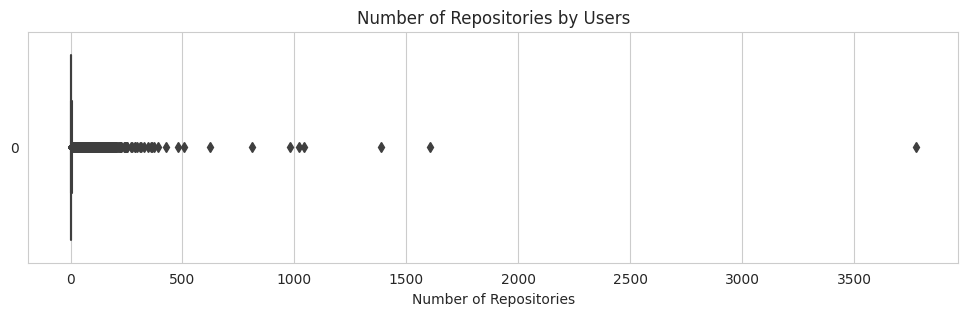

In [41]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.figure(figsize=(12,3))
sns.boxplot(owner_repos.total_repos, orient='h')
plt.xlabel('Number of Repositories')
plt.title('Number of Repositories by Users')

Text(0.5, 1.0, 'Number of Forked Repositories by Users')

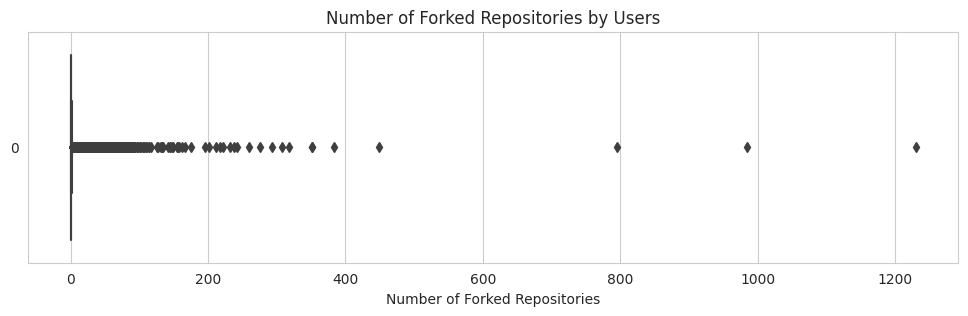

In [37]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.figure(figsize=(12,3))
sns.boxplot(owner_repos.fork_repos, orient='h')
plt.xlabel('Number of Forked Repositories')
plt.title('Number of Forked Repositories by Users')

####Conclusion
*   The average user owns 1-3 repositories on Github. The max number of repositories owned by a user is 3778.
*   The average user owns 0-1 forked repositories on Github. The max number of forked respositories owned by a user is 1231
*   2 out of the top 5 repository owners have more than 85% forked repositories. (They have more forked repositories than fresh repositories)





## Pattern for Forked Repositories

In [51]:
forked_repos = df_new.fork.value_counts()
forked_repos

False    673310
True     326690
Name: fork, dtype: int64

In [52]:
percentage_forked = (forked_repos[1]/(forked_repos[0]+forked_repos[1]))*100
percentage_forked

32.669

####Conclusion
The percentage of forked repositories in the most recent 1 million public Github repositories is 32.67%.